頂点数
44186


C:\Users\ku-admin\AppData\Local\Temp\ipykernel_8292\749462144.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis") # カラーマップを選択


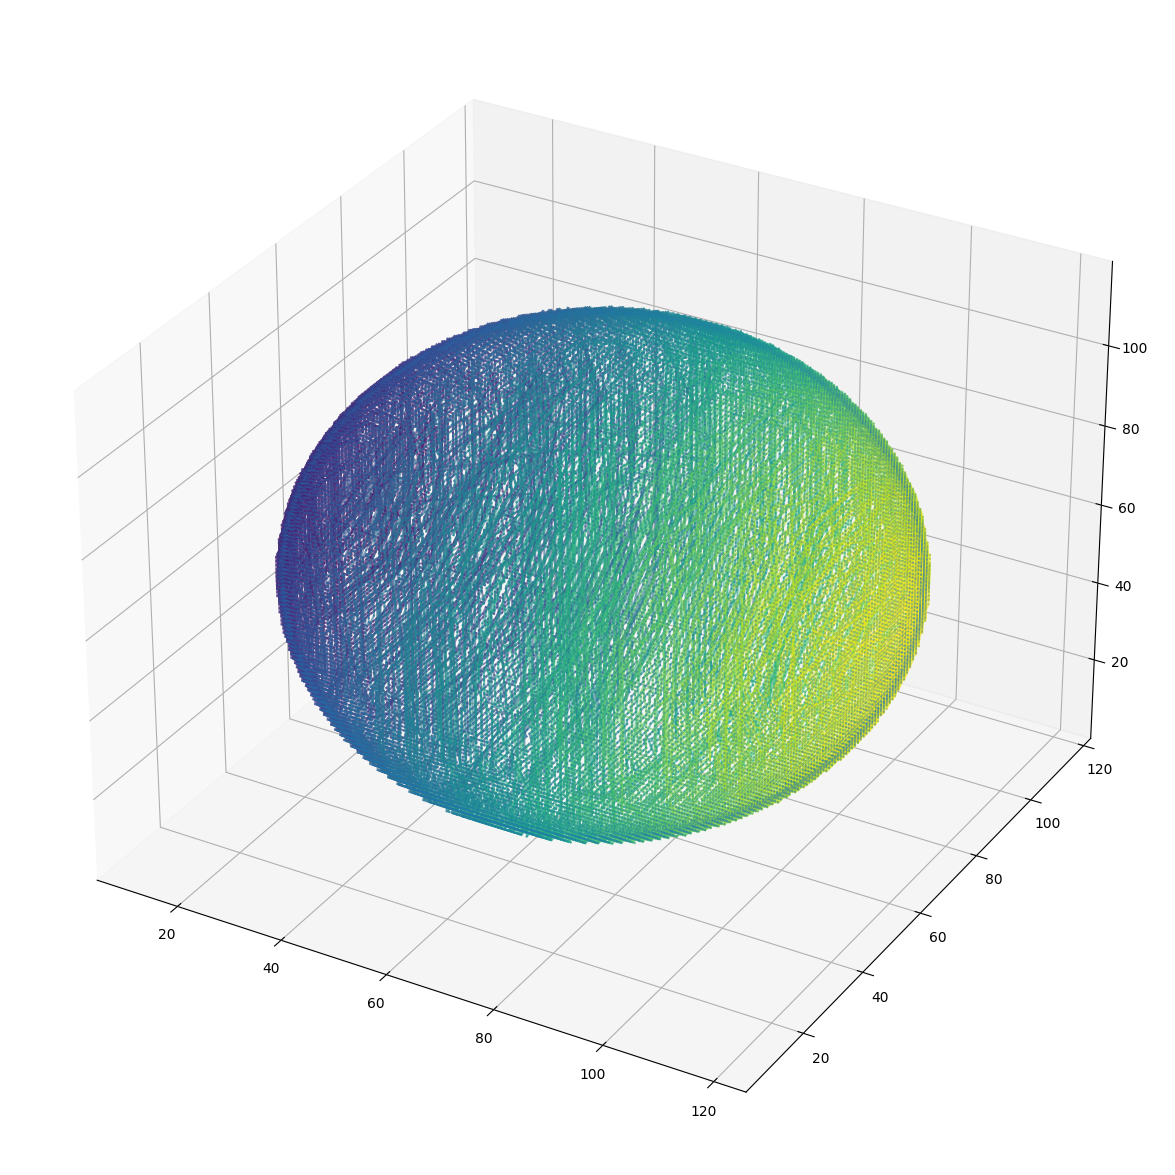

距離の和
78007.0


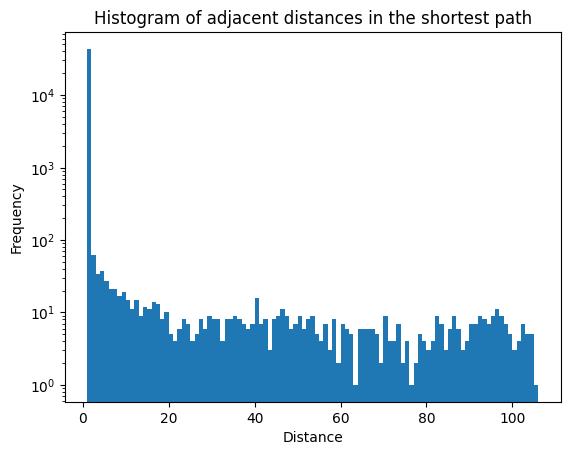

座標を送る場合
239531
変位を送る場合
927906


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def read_path_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        path = [int(line.strip()) for line in lines]
    return path


# 二点間の距離を計算する関数
def distance(p1, p2):
    #return np.sqrt(np.sum((p1 - p2) ** 2))
    
    diff = np.abs(p1 - p2)
    max_diff = np.max(diff)
    return max_diff

def generate_coordinates(n):
    cube_size = n
    coordinates = []
    offset = cube_size / 2
    for x in range(0, cube_size + 1):
        for y in range(0, cube_size + 1):
            for z in range(0, cube_size + 1):
                if x == 0 or x == cube_size or y == 0 or y == cube_size or z == 0 or z == cube_size:
                    coordinates.append((x - offset, y - offset, z - offset))
    return np.array(coordinates)


# グラフ上の経路をプロットする関数
def plot_path(path, x, y, z):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s = 0.05)
     # 経路をプロット
    n = len(path) - 1
    cmap = plt.cm.get_cmap("viridis") # カラーマップを選択
    for i in range(n):
        color = cmap(i / n) # 現在の経路に応じて色を変更
        ax.plot([coordinates[path[i]][0], coordinates[path[i + 1]][0]],
                [coordinates[path[i]][1], coordinates[path[i + 1]][1]],
                [coordinates[path[i]][2], coordinates[path[i + 1]][2]], color=color, alpha=0.6)
    # グラフを表示
    plt.show()

# 隣り合う二点間の距離を計算する関数
def adjacent_distances(path, coordinates):
    distances = []
    for i in range(len(path) - 1):
        distances.append(distance(coordinates[path[i]], coordinates[path[i + 1]]))
    return distances
    
# ヒストグラムをプロットする関数
def plot_histogram(distances):
    # ヒストグラムを表示
    plt.hist(distances, bins=np.arange(min(distances), max(distances) + 1))
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.yscale('log')  # 追加：縦軸をlogスケールに変更
    plt.title('Histogram of adjacent distances in the shortest path')
    plt.show()

def calc(distances):
    sum = 0
    for i in range(len(distances)):
        if distances[i] == 1: #距離が１の場合は５ビットでいい
            sum += 5
        else:
            sum += 21 + 5 #距離が１でない場合は５ビットに加えてフルで２１ビット使う
    return sum

#100の立方体
"""
n = 100
coordinates = generate_coordinates(n)
x, y, z = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]
"""

#球か立方体(blender)
coordinates = np.loadtxt('sphere.txt', delimiter=',')
x = coordinates[:, 0]
y = coordinates[:, 1]
z = coordinates[:, 2]


filename = "path_output.txt"
path = read_path_from_file(filename)
print("頂点数")
print(len(path))
#print(path)
plot_path(path, x, y, z)
# 隣り合う二点間の距離を計算
distances = adjacent_distances(path, coordinates)
print("距離の和")
print(np.sum(distances))
# ヒストグラムをプロット
plot_histogram(distances)
sum = calc(distances)
print("変位を送る場合")
print(sum)
print("座標を送る場合")
print(coordinates.shape[0]*21)
